# Assignment 3: Inequality 
Malcolm Mason Rodriguez

[Problem 1](#Problem-1) | [Problem 2](#Problem-2) | [Problem 3](#Problem-3) | [Problem 4](#Problem-4) | [Problem 5](#Problem-5) | [Problem 6](#Problem-6) | [Problem 7](#Problem-7) | [Problem 8](#Problem-8) | [Problem 9](#Problem-9) |  [Problem 10](#Problem-10)

###Import dependencies:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plots

###Import income data into data frame:

In [2]:
income_data = pd.read_csv('income_data.csv')
del income_data['Unnamed: 4']
income_data.Income = income_data.Income.apply(lambda i: i.replace(',',''))
income_data.Income = income_data.Income.astype(float)
income_data.head()

,Planet,Year,Person,Income
0,Mercury,1990,Person 1,100345.00
1,Mercury,1990,Person 2,98700.00
2,Mercury,1990,Person 3,98630.91
3,Mercury,1990,Person 4,99522.50
4,Mercury,1990,Person 5,97877.50


### Calculate cummulative income shares at relevent percentiles

In [3]:
def get_cum_income_shares(incomes):
    incomes = np.array(sorted(incomes))
    income_shares = [income / incomes.sum() for income in incomes]
    cum_income_shares = []
    for i, income_share in enumerate(income_shares):
        if i == 0:
            cum_income_shares.append(income_share)
        else:
            cum_income_shares.append(cum_income_shares[i-1] + income_share)

    return cum_income_shares

### Calculate gini coeficients given cum income shares

In [4]:
def gini_calc(cum_income_shares): 

    bin_pct = 1. / len(cum_income_shares)
    bins = {}
    gini_coef = 0

    for i, cum_income_share in enumerate(cum_income_shares):
        if i == 0:
            prev_cum_income_share = 0
            bins[i] = (0.0, 0.0)
        else:
            prev_cum_income_share = cum_income_shares[i-1]

        bin_area = ((prev_cum_income_share + cum_income_share) / 2) * bin_pct
        bins[bin_pct*(i+1)] = (bin_area, cum_income_share)
        gini_coef += bin_area
        
    return gini_coef, bins

##Problem 1
**Calculate the mean income for each planet in each year. Report the values you find. You should have 21 (7x3) values in your solution. Plot your findings. Also calculate the mean income for the whole solar system in each year. In 1-2 sentences, discuss how mean incomes change in each planet and throughout the solar system.**

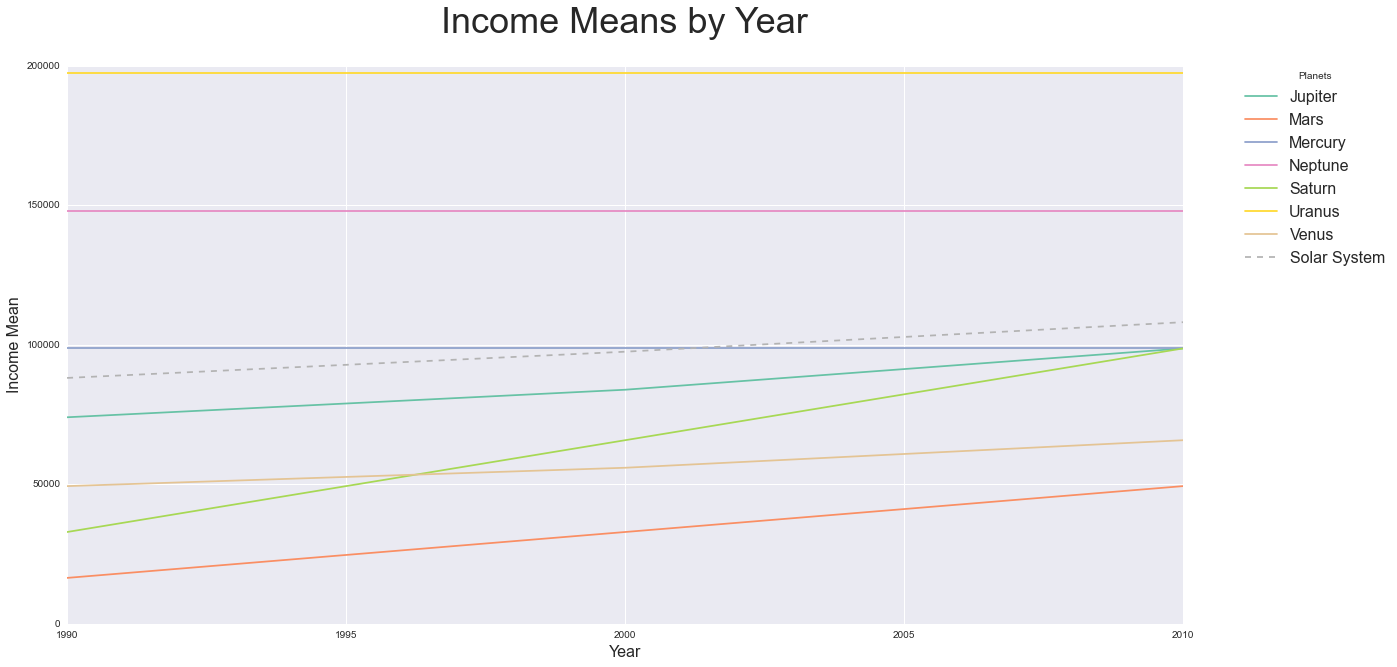

In [5]:
income_means = {}

for planet in income_data.Planet.unique():
    income_means[planet] = {}
    for year in income_data.Year.unique():
        incomes = income_data[(income_data.Planet == planet) & (income_data.Year == year)].Income.values
        income_means[planet][year] = incomes.mean()


income_means_df = pd.DataFrame(income_means)
income_means_df['Solar System'] = [income_means_df.ix[year].values.mean() for year in income_means_df.index.values]
plots.problem1_means(income_means_df)

Uranus, Neptune and Mercury seem to have stagnant mean incomes over the observed period, while the mean income of rest of the solar system is increasing over this same period. Saturn seems to have the greatest change in mean income.

##Problem 2
**Calculate the Gini coefficient for each planet/year pair. Report the values you find.
You should have 21 (7x3) values in your solution. Plot your findings.
In 1-2 sentences, summarize and briefly analyze your findings. How is inequality on each planet changing over time?
Hint: when calculating the Gini coefficient, approximate the area under the Lorenz curve using rectangles and triangles.**

/Users/hopemason/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


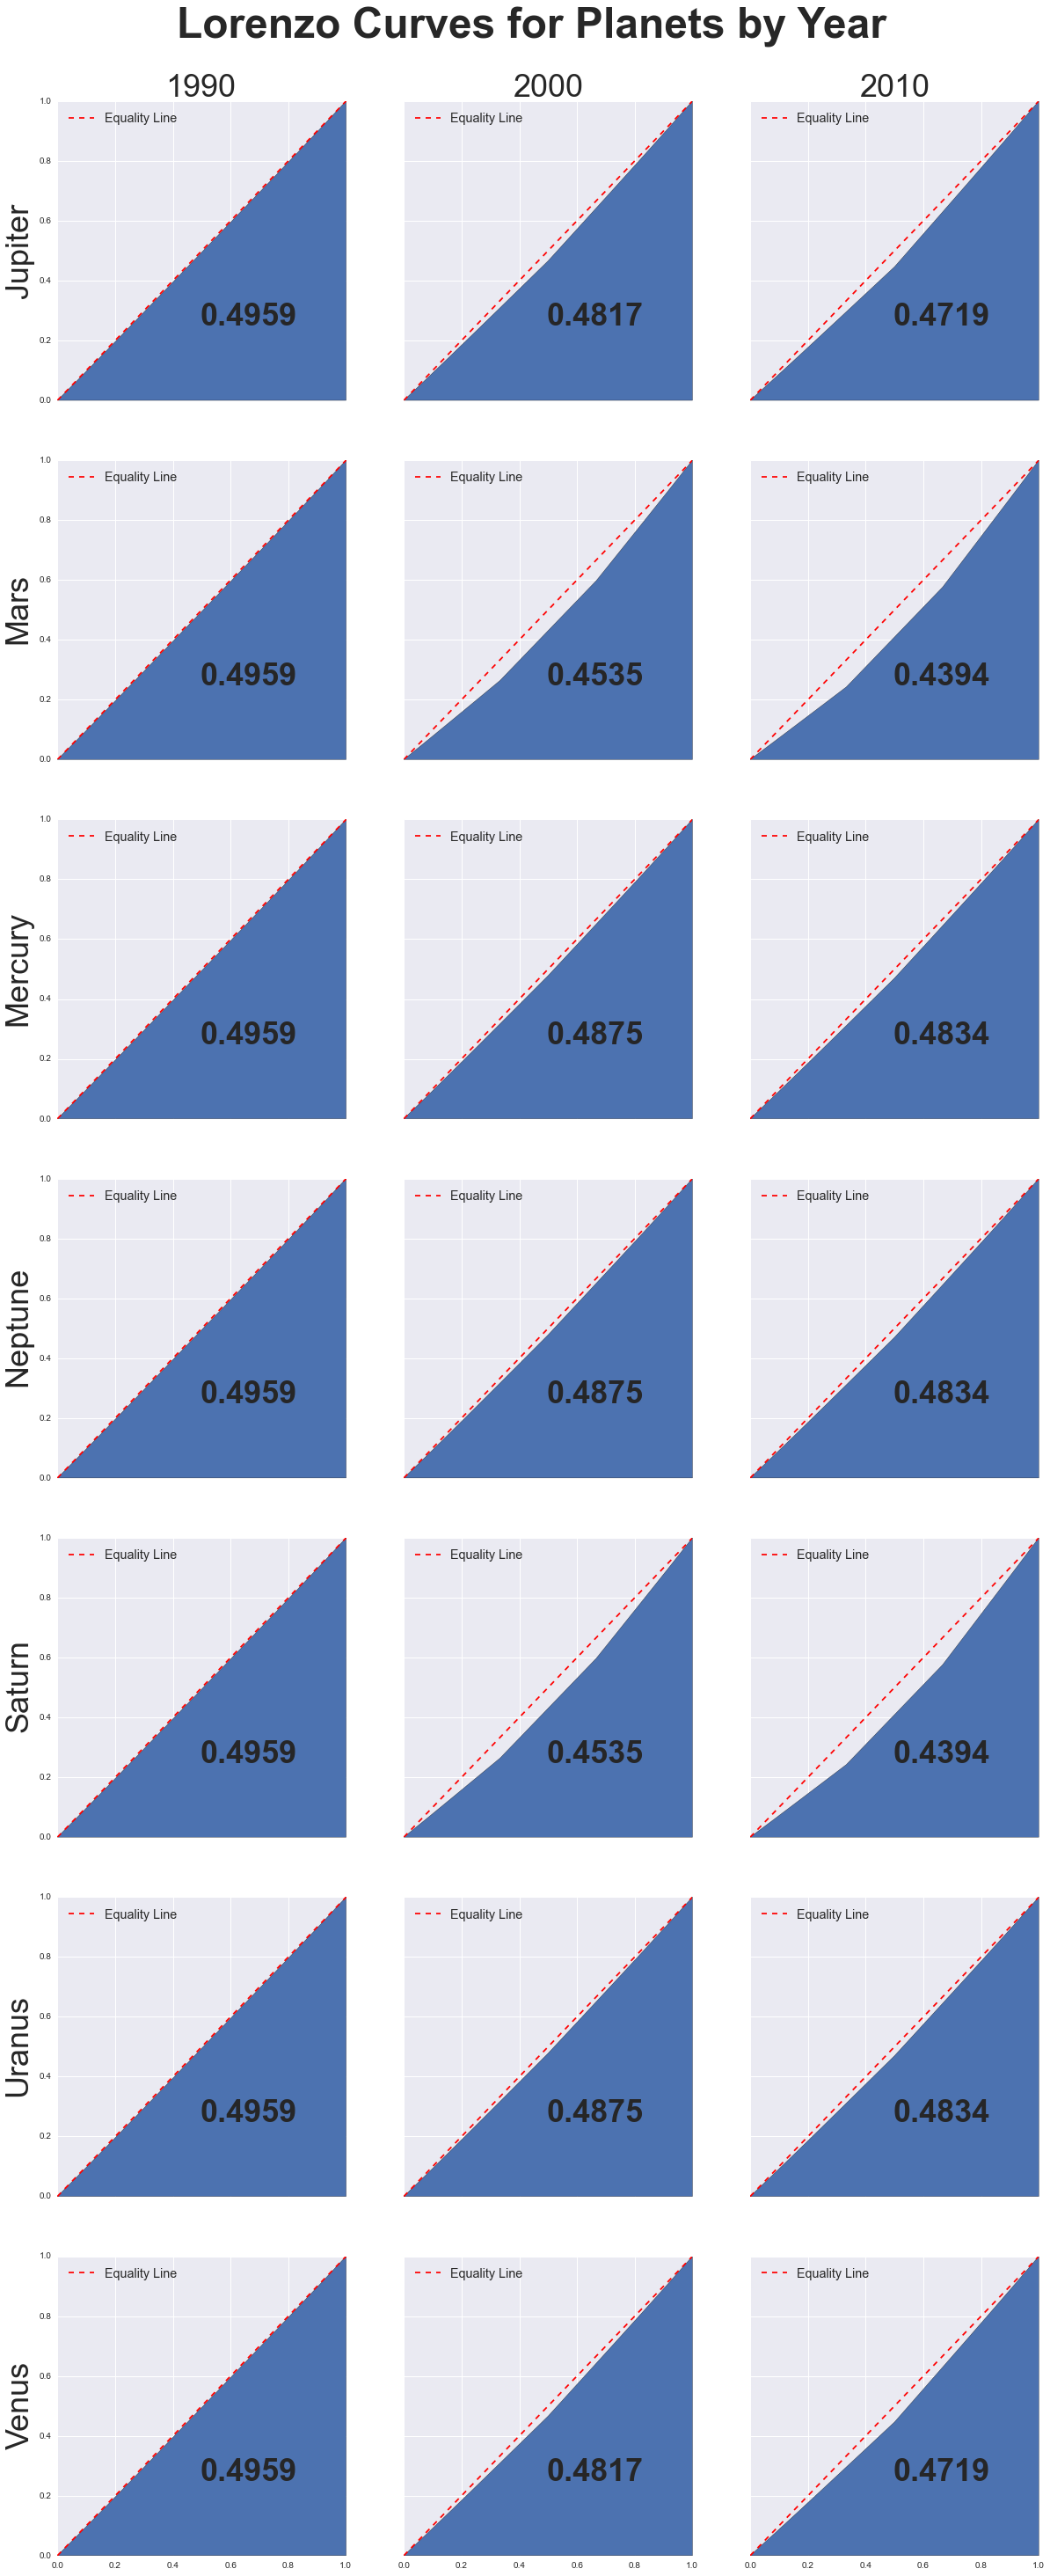

In [6]:
gini_coefs = {}
income_shares = {}

for planet in income_data.Planet.unique():
    income_shares[planet] = {}
    gini_coefs[planet] = {}
    for year in income_data.Year.unique():
        incomes = income_data[(income_data.Planet == planet) & (income_data.Year == year)].Income.values
        cum_income_shares = get_cum_income_shares(incomes)
        coef, income_bins = gini_calc(cum_income_shares)
        income_shares[planet][year] = income_bins
        gini_coefs[planet][year] = coef
        
gini_coefs_df = pd.DataFrame(gini_coefs)
plots.problem2_lorenzos(gini_coefs_df, income_shares)

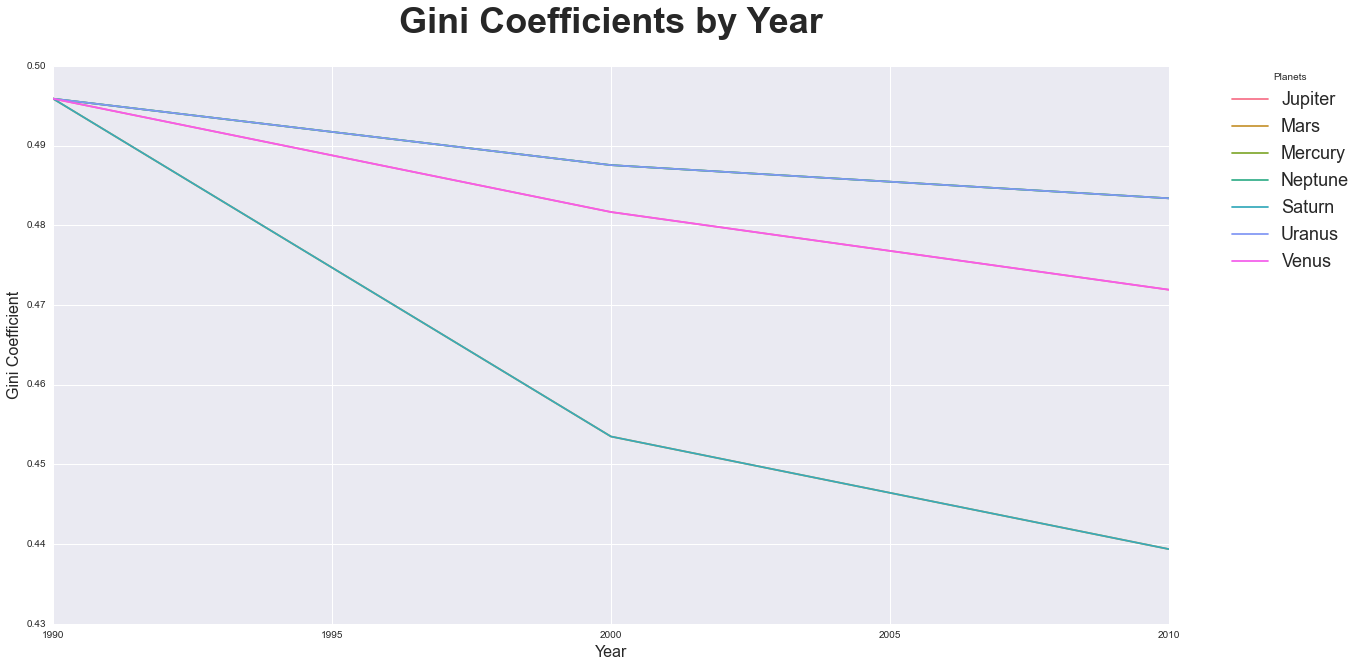

In [7]:
plots.problem2_ginis(gini_coefs_df)

##Problem 3
**Comment, in a sentence or two, on the relationship between the Gini coefficients you calculated and the mean incomes for each planet/year pair. How is it that planets with such different standards of livings have similar Gini coefficients?**

##Problem 4
**Calculate the Gini coefficient for the solar system as a whole, that is, across all 84 people in the dataset, over time. You should have 3 values (one for each year) in your solution.
￼In 1-2 sentences, summarize and briefly analyze your findings. How is inequality for the solar system as a whole changing over time? Compare and contrast this result with question 1. What intuition can you give for the relationship between your findings for the two parts?**


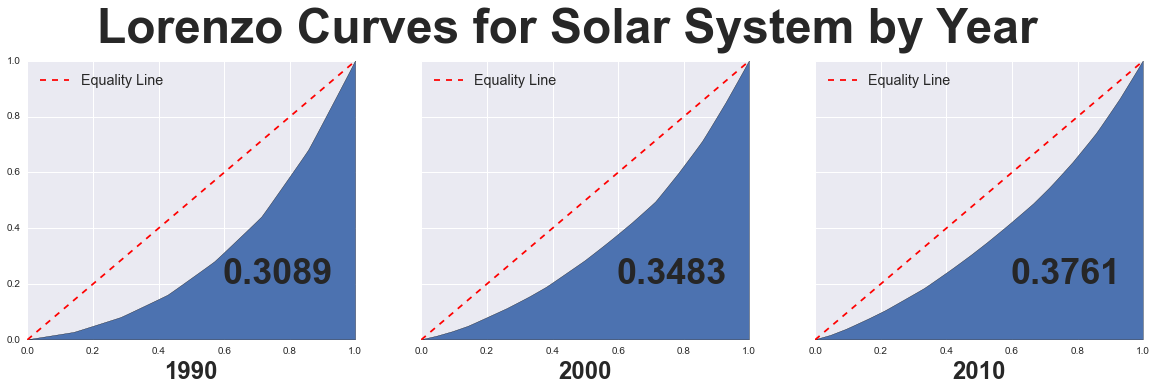

In [8]:
gini_coefs = []
income_shares = {}

for year in income_data.Year.unique():
    incomes = income_data[income_data.Year == year].Income.values
    cum_income_shares = get_cum_income_shares(incomes)
    coef, income_bins = gini_calc(cum_income_shares)
    income_shares[year] = income_bins
    gini_coefs.append(coef)

gini_coefs_df = pd.DataFrame(gini_coefs, columns=['Solar System'], index=income_data.Year.unique())
plots.lorenzo(gini_coefs_df, income_shares)

##Problem 5
**Calculate the Gini coefficient for the solar system as a whole, this time considering the unit of measure to be a “planet” rather than a “person”, over time. That is, calculate the Gini coefficient across the 7 planets. You should again have 3 values, one for each year, in your solution. In 1-2 sentences, summarize and briefly analyze your findings. How does this answer relate to the answer from question 2? Compare and contrast this result, and provide intuition for the relationship between your findings for the two parts.**

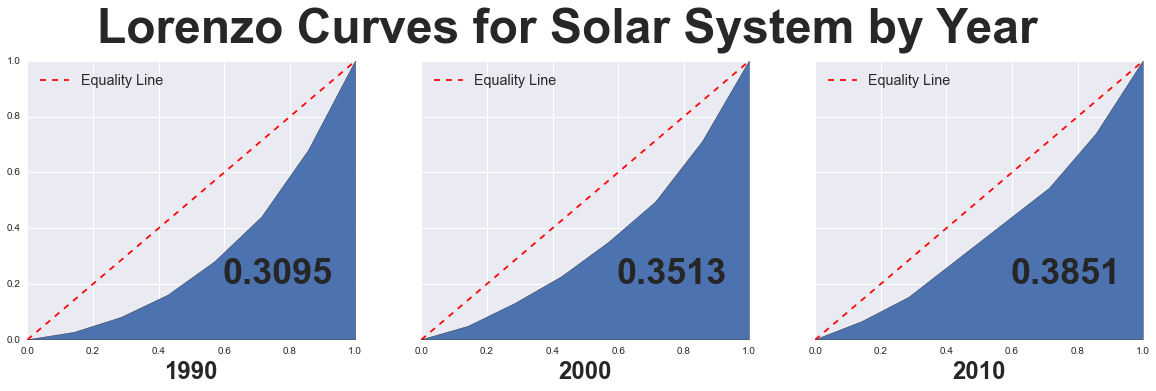

In [11]:
gini_coefs = []
income_shares = {}

for year in income_data.Year.unique():
    planet_incomes = []
    for planet in income_data.Planet.unique():
        planet_income = income_data[(income_data.Year == year) & (income_data.Planet == planet)].Income.sum()
        planet_incomes.append(planet_income)
        
    cum_income_shares = get_cum_income_shares(planet_incomes)
    coef, income_bins = gini_calc(cum_income_shares)
    income_shares[year] = income_bins
    gini_coefs.append(coef)

gini_coefs_df = pd.DataFrame(gini_coefs, columns=['Solar System'], index=income_data.Year.unique())
plots.lorenzo(gini_coefs_df, income_shares)